In [3]:
import glob
import time
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import altair as alt
pd.set_option('display.max_columns', None)

import Utility_functions as ut

#Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

#Distnce Matrix
from scipy.spatial import distance_matrix, distance
from scipy.special import softmax

data_dir = 'C:/Dissertation/Data/'
kg_vec = 1020

In [49]:
Final_Images_df, predicate_df = ut.AWA2DataLoader(data_dir, data_type = "ResNet101-Features", 
                                                  Resnet101Type = 1, 
                                                  animal_attributes = 'DBpedia', 
                                                  VectorType = 'Continous')

#data_type options
#1. "ResNet101-Features" to load Extracted Resnet101 features Avg. Time - 12 secs
#2. "Images"

#Resnet101Type
# 1 - Using Resnet Features provided with data
# 2 - Using Resnet Features extracted by Abhimanyu Acharya using a pretrainied Resnet101

# animal_attribute
#1. "AwA2" - As provided with AwA2 data
#2. "Custom Animal Attribute KG" - Custom KGs
#3. "Custom KG Extended 01" - Custom KGs with ontology alignment
#3. "Custom KG Extended 02" - Custom KGs with ontology alignment + vector combination
#4. "Word2Vec" - word2vec-google-news-300
#4. "Word2Vec Extended" - Extended Word2Vec
#5. "Dbnary" - Dbnary Knowledge Graph/Wiktionary (KGVec2Go Wiktionary/DBnary)
#6. "DBpedia" - DBPedia Knowledge Graph (KGVec2Go Classic RDF2vec: 500 walks, depth: 4, SG, 200 dimensions)
#7. "WordNet" - WordNet Knowledge Graph (KGVec2Go WordNet)
#8. "Custom Animal Attribute KG Extended" - Extended Custom KGs


Using Resnet101 Features provided with data
Animal Attributes Included - Continous Vector
DBpedia Animal Attributes Included
Execution time: 12.64443325996399 seconds


In [50]:
trainval_df, TrainData01, ValData01, TrainData02, ValData02, TrainData03, ValData03, Seen_test_df, Unseen_test_df = ut.TestTrainValsplitdata_dir(data_dir, Final_Images_df)

  Training - Validation Split 01 
 Train Classes  
 Number of Classes 27 
 ['antelope' 'buffalo' 'chihuahua' 'collie' 'cow' 'elephant' 'fox'
 'german+shepherd' 'grizzly+bear' 'hippopotamus' 'humpback+whale'
 'killer+whale' 'lion' 'mouse' 'otter' 'persian+cat' 'pig' 'polar+bear'
 'rhinoceros' 'siamese+cat' 'skunk' 'spider+monkey' 'squirrel' 'tiger'
 'weasel' 'wolf' 'zebra'] 

 Validation Classes  
 Number of Classes 13 
 ['beaver' 'chimpanzee' 'dalmatian' 'deer' 'giant+panda' 'gorilla'
 'hamster' 'leopard' 'mole' 'moose' 'ox' 'rabbit' 'raccoon'] 

  Training - Validation Split 02 
 Train Classes  
 Number of Classes 27 
 ['buffalo' 'chimpanzee' 'collie' 'cow' 'deer' 'elephant' 'german+shepherd'
 'giant+panda' 'gorilla' 'hamster' 'hippopotamus' 'humpback+whale'
 'leopard' 'lion' 'mole' 'moose' 'mouse' 'polar+bear' 'rabbit' 'raccoon'
 'rhinoceros' 'siamese+cat' 'spider+monkey' 'squirrel' 'tiger' 'weasel'
 'wolf'] 

 Validation Classes  
 Number of Classes 13 
 ['antelope' 'beaver' 'chihua

In [51]:
Test = predicate_df[predicate_df['classes'].isin((Unseen_test_df.classes.unique()).tolist())]
Train = predicate_df[predicate_df['classes'].isin((trainval_df.classes.unique()).tolist())]

# Animal attributes

(array([ 5.85661203,  7.32076504,  8.05284155,  9.51699455,  8.78491805,
         5.12453553, 10.24907106,  2.19622951,  1.46415301,  3.66038252]),
 array([0.00169697, 0.01776729, 0.03383762, 0.04990794, 0.06597826,
        0.08204859, 0.09811891, 0.11418923, 0.13025955, 0.14632988,
        0.1624002 ]),
 <BarContainer object of 10 artists>)

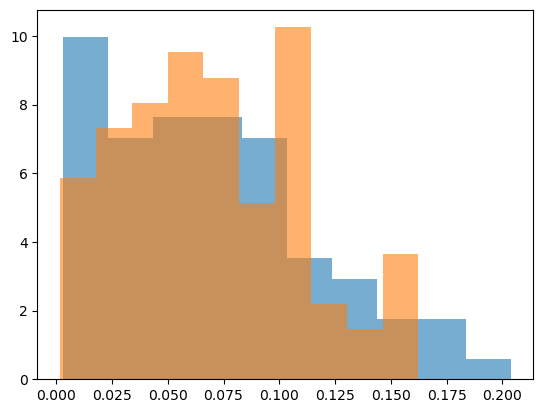

In [35]:
plt.hist(np.mean(Train.iloc[:,1:86]), density= True, alpha=0.6)
plt.hist(np.mean(Test.iloc[:,1:86]), density= True, alpha=0.6)

# Word2Vec

(array([0.0420426 , 0.21021298, 0.50451116, 1.42944829, 2.606641  ,
        2.35438542, 2.77481139, 1.63966128, 0.88289453, 0.16817039]),
 array([-0.4442627 , -0.36497803, -0.28569336, -0.20640869, -0.12712402,
        -0.04783936,  0.03144531,  0.11072998,  0.19001465,  0.26929932,
         0.34858398]),
 <BarContainer object of 10 artists>)

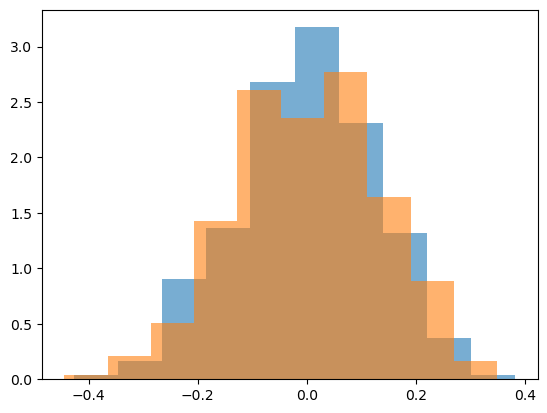

In [36]:
plt.hist(np.mean(Train.iloc[:,-300:]), density= True, alpha=0.6)
plt.hist(np.mean(Test.iloc[:,-300:]), density= True, alpha=0.6)

# Custom KG

(array([0.08986985, 0.22467463, 0.62908897, 2.5313342 , 3.26527134,
        2.35159449, 0.79385037, 0.22467463, 0.04493493, 0.02995662]),
 array([-0.43940074, -0.34121955, -0.24303835, -0.14485716, -0.04667597,
         0.05150523,  0.14968642,  0.24786761,  0.34604881,  0.44423   ,
         0.54241119]),
 <BarContainer object of 10 artists>)

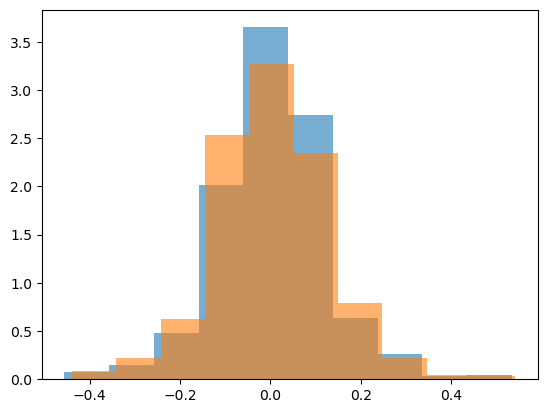

In [48]:
plt.hist(np.mean(Train.iloc[:,-680:]), density= True, alpha=0.6)
plt.hist(np.mean(Test.iloc[:,-680:]), density= True, alpha=0.6)

# DBPedia

(array([0.14669587, 0.14669587, 0.83127659, 1.02687108, 1.56475593,
        2.7872215 , 1.7114518 , 1.0757697 , 0.39118898, 0.09779725]),
 array([-0.53073873, -0.42848636, -0.32623399, -0.22398162, -0.12172925,
        -0.01947688,  0.08277548,  0.18502785,  0.28728022,  0.38953259,
         0.49178496]),
 <BarContainer object of 10 artists>)

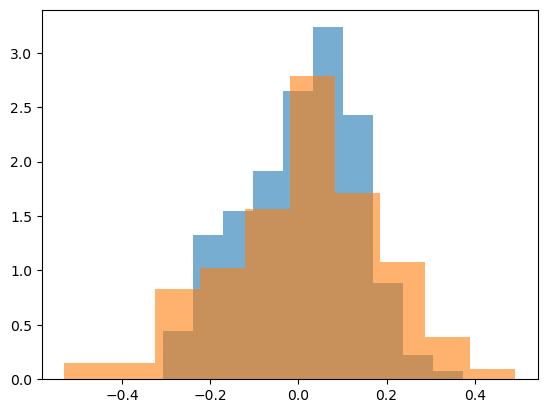

In [52]:
plt.hist(np.mean(Train.iloc[:,-200:]), density= True, alpha=0.6)
plt.hist(np.mean(Test.iloc[:,-200:]), density= True, alpha=0.6)

In [55]:
from scipy.stats import ks_2samp
ks_2samp(np.mean(Train.iloc[:,-200:]), np.mean(Test.iloc[:,-200:]))

KstestResult(statistic=0.12, pvalue=0.11228360286766195)